# Data Science

This notebook outlines techniques for effectively loading, storing, and manipulating in-memory data in Python. <br>
The topic is very broad: datasets can come from a **wide range of sources and a wide range of formats**, including collections of documents, collections of images, collections of sound clips, collections of numerical measurements, or nearly anything else.
Despite this apparent heterogeneity, it will help us to think of **all data fundamentally as arrays of numbers**.

For example, digital images can be thought of as simply two-dimensional arrays of numbers representing pixel brightness across the area.
Text can be converted in various ways into numerical representations, perhaps binary digits representing the frequency of certain words or pairs of words.
No matter what the data are, the **first step in making it analyzable will be to transform them into arrays of numbers**.

For this reason, efficient storage and manipulation of numerical arrays is absolutely fundamental to the process of doing data science.
NumPy (short for *Numerical Python*) is the Python package that provides an efficient interface to store and operate on dense data buffers (arrays).
In some ways, NumPy arrays are like Python's built-in ``list`` type, but NumPy arrays provide much more efficient storage and data operations as the arrays grow larger in size.
NumPy arrays form the core of nearly the entire ecosystem of data science tools in Python.

This notebook will cover **Pandas** and not Numpy. 
Pandas is a package built on top of NumPy, and provides an efficient implementation of a `DataFrame`.
DataFrames are essentially multidimensional arrays with attached row and column labels, and often with heterogeneous types and/or missing data.

---
# Pandas

## Installing Pandas

The installation is as always:

In [1]:
!pip install pandas
#!pip3 install pandas
#!conda install pandas

zsh:1: command not found: pip


Once Pandas is installed, you can import it and check the version:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.__version__

'1.4.2'

We will import Pandas under the alias ``pd``, this is the standard way to use pandas!

As you read through this file, don't forget that IPython gives you the ability to quickly explore the contents of a package (by using the tab-completion feature) as well as the documentation of various functions (using the ``?`` character).

In [3]:
pd?

Type:        module
String form: <module 'pandas' from '/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/__init__.py'>
File:        /Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/__init__.py
Docstring:  
pandas - a powerful data analysis and manipulation library for Python

**pandas** is a Python package providing fast, flexible, and expressive data
structures designed to make working with "relational" or "labeled" data both
easy and intuitive. It aims to be the fundamental high-level building block for
doing practical, **real world** data analysis in Python. Additionally, it has
the broader goal of becoming **the most powerful and flexible open source data
analysis / manipulation tool available in any language**. It is already well on
its way toward this goal.

Main Features
-------------
Here are just a few of the things that pandas does well:

  - Easy handling of missing data in floating point as well as non-

----
## Pandas Objects

At the very basic level, Pandas objects can be thought of as enhanced versions of NumPy structured arrays in which the rows and columns are identified with labels rather than simple integer indices.

### Series

A Pandas ``Series`` is a one-dimensional array of indexed data.
It can be created from a list or array as follows:

In [4]:
data = pd.Series([0.25, 0.5, 0.75, 1.0])
data

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64

As we see in the output, the ``Series`` wraps both a sequence of values and a sequence of indices, which we can access with the ``values`` and ``index`` attributes.

In [5]:
data.values

array([0.25, 0.5 , 0.75, 1.  ])

In [6]:
data.index

RangeIndex(start=0, stop=4, step=1)

Like in lists and tuples, data can be accessed by the associated index via the familiar Python square-bracket notation:

In [7]:
data[1:3]

1    0.50
2    0.75
dtype: float64

It may look like the ``Series`` object is basically interchangeable with a one-dimensional NumPy array or a list.

The essential difference is the **presence of the index**: while the Numpy Array has an *implicitly defined* integer index used to access the values, the Pandas ``Series`` has an *explicitly defined* index associated with the values.

In [8]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=['a', 'b', 'c', 'd'])
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [9]:
data['a']

0.25

> Note also that Series objects take a data type based on the elements used to construct it. The avaialable type are:

| Data type	    | Description |
|---------------|-------------|
| ``bool_``     | Boolean (True or False) stored as a byte |
| ``int_``      | Default integer type (same as C ``long``; normally either ``int64`` or ``int32``)| 
| ``intc``      | Identical to C ``int`` (normally ``int32`` or ``int64``)| 
| ``intp``      | Integer used for indexing (same as C ``ssize_t``; normally either ``int32`` or ``int64``)| 
| ``int8``      | Byte (-128 to 127)| 
| ``int16``     | Integer (-32768 to 32767)|
| ``int32``     | Integer (-2147483648 to 2147483647)|
| ``int64``     | Integer (-9223372036854775808 to 9223372036854775807)| 
| ``uint8``     | Unsigned integer (0 to 255)| 
| ``uint16``    | Unsigned integer (0 to 65535)| 
| ``uint32``    | Unsigned integer (0 to 4294967295)| 
| ``uint64``    | Unsigned integer (0 to 18446744073709551615)| 
| ``float_``    | Shorthand for ``float64``.| 
| ``float16``   | Half precision float: sign bit, 5 bits exponent, 10 bits mantissa| 
| ``float32``   | Single precision float: sign bit, 8 bits exponent, 23 bits mantissa| 
| ``float64``   | Double precision float: sign bit, 11 bits exponent, 52 bits mantissa| 
| ``complex_``  | Shorthand for ``complex128``.| 
| ``complex64`` | Complex number, represented by two 32-bit floats| 
| ``complex128``| Complex number, represented by two 64-bit floats| 

In [10]:
ints = pd.Series([i for i in range(1, 100, 10)])
ints

0     1
1    11
2    21
3    31
4    41
5    51
6    61
7    71
8    81
9    91
dtype: int64

In [11]:
floats = pd.Series([i * 1. for i in range(1, 100, 10)])
floats

0     1.0
1    11.0
2    21.0
3    31.0
4    41.0
5    51.0
6    61.0
7    71.0
8    81.0
9    91.0
dtype: float64

In [12]:
objects = pd.Series([10, 10.5, 'ciao'])
objects

0      10
1    10.5
2    ciao
dtype: object

> Is the Series object similar to another Python data structure?

**Yes**, you can think of a Pandas ``Series`` a bit like a specialization of a Python dictionary. <br>
A dictionary is a structure that maps arbitrary keys to a set of arbitrary values, and a ``Series`` is a structure which maps typed keys to a set of typed values.

The ``Series``-as-dictionary analogy can be made even more clear by constructing a ``Series`` object directly from a Python dictionary:

In [13]:
population_dict = {'California': 38332521,
                   'Texas': 26448193,
                   'New York': 19651127,
                   'Florida': 19552860,
                   'Illinois': 12882135}
population = pd.Series(population_dict)
population

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

Unlike a dictionary, though, the ``Series`` also supports array-style operations such as slicing:

In [14]:
population['California':'Florida']

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
dtype: int64

### DataFrame

Like the ``Series`` object discussed in the previous section, the ``DataFrame`` can be thought of either as a generalization of a NumPy array, or as a specialization of a Python dictionary.

If a ``Series`` is an analog of a one-dimensional array with flexible indices, a ``DataFrame`` is an analog of a two-dimensional array with both **flexible row indices and flexible column names**.

To demonstrate this, let's first construct a new ``Series`` listing the area of each of the five states discussed in the previous section:

In [15]:
area_dict = {'California': 423967, 'Texas': 695662, 'New York': 141297,
             'Florida': 170312, 'Illinois': 149995}
area = pd.Series(area_dict)
area

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
dtype: int64

Now that we have this along with the ``population`` Series from before, we can use a dictionary to construct a single two-dimensional object containing this information:

In [16]:
states = pd.DataFrame({'population': population,
                       'area': area})
states

,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


Like the ``Series`` object, the ``DataFrame`` has an ``index`` attribute that gives access to the row labels and a ``columns``attribute that gives access to the column labels:

In [17]:
states.values

array([[38332521,   423967],
       [26448193,   695662],
       [19651127,   141297],
       [19552860,   170312],
       [12882135,   149995]])

In [18]:
states.index

Index(['California', 'Texas', 'New York', 'Florida', 'Illinois'], dtype='object')

In [19]:
states.columns

Index(['population', 'area'], dtype='object')

We can also think of a ``DataFrame`` as a specialization of a dictionary.
Where a dictionary maps a key to a value, a ``DataFrame`` maps a column name to a ``Series`` of column data.

For example, asking for the ``'area'`` attribute returns the ``Series`` object containing the areas we saw earlier:

In [20]:
states['area']

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

In [21]:
states.area

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

#### Different ways to construct a DataFrame

**From a single Series object:**

In [22]:
pd.DataFrame(population, columns=['pop'])

,pop
California,38332521
Texas,26448193
New York,19651127
Florida,19552860
Illinois,12882135


**From a list of dicts:**

In [23]:
data = [{'a': i, 'b': 2 * i} for i in range(3)]
pd.DataFrame(data)

,a,b
0,0,0
1,1,2
2,2,4


**From a dictionary of Series objects:**

In [24]:
pd.DataFrame([population, area], index=['population', 'area'])

,California,Texas,New York,Florida,Illinois
population,38332521,26448193,19651127,19552860,12882135
area,423967,695662,141297,170312,149995


In [25]:
pd.DataFrame({'population': population,
              'area': area})

,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


**From a two-dimensional list:**

In [26]:
pd.DataFrame([[i + j for j in range(2)] for i in range(3)],
             columns=['foo', 'bar'],
             index=['a', 'b', 'c'])

,foo,bar
a,0,1
b,1,2
c,2,3


**From a NumPy array:**

In [27]:
pd.DataFrame(np.random.rand(3, 2),
             columns=['foo', 'bar'],
             index=['a', 'b', 'c'])

,foo,bar
a,0.211965,0.446158
b,0.823189,0.630481
c,0.954053,0.342876


#### DataFrame indexing

This attribute-style column access actually accesses the exact same object as the dictionary-style access:

In [28]:
states.area is states['area']

True

In particular, you should **avoid the temptation to try column assignment via attribute** (i.e., use ``data['pop'] = z`` rather than ``data.pop = z``).

Like with the ``Series`` objects discussed earlier, this dictionary-style syntax can also be used to modify the object, in this case adding a new column:

In [29]:
states['density'] = states['population'] / states['area']
states

,population,area,density
California,38332521,423967,90.413926
Texas,26448193,695662,38.018740
New York,19651127,141297,139.076746
Florida,19552860,170312,114.806121
Illinois,12882135,149995,85.883763


As mentioned previously, we can also view the ``DataFrame`` as an enhanced two-dimensional array.
We can examine the raw underlying data array using the ``values`` attribute:

In [30]:
states.values

array([[3.83325210e+07, 4.23967000e+05, 9.04139261e+01],
       [2.64481930e+07, 6.95662000e+05, 3.80187404e+01],
       [1.96511270e+07, 1.41297000e+05, 1.39076746e+02],
       [1.95528600e+07, 1.70312000e+05, 1.14806121e+02],
       [1.28821350e+07, 1.49995000e+05, 8.58837628e+01]])

With this picture in mind, many familiar array-like observations can be done on the ``DataFrame`` itself.
For example, we can transpose the full ``DataFrame`` to swap rows and columns:

In [31]:
states.T

,California,Texas,New York,Florida,Illinois
population,3.833252e+07,2.644819e+07,1.965113e+07,1.955286e+07,1.288214e+07
area,4.239670e+05,6.956620e+05,1.412970e+05,1.703120e+05,1.499950e+05
density,9.041393e+01,3.801874e+01,1.390767e+02,1.148061e+02,8.588376e+01


When it comes to indexing of ``DataFrame`` objects, however, it is clear that the dictionary-style indexing of columns precludes our ability to simply treat it as a NumPy array.
In particular, passing a single index to an array accesses a row:

In [32]:
states.values[0]

array([3.83325210e+07, 4.23967000e+05, 9.04139261e+01])

and passing a single "index" to a ``DataFrame`` accesses a column:

In [33]:
states['area']

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

Thus for array-style indexing, we need another convention.
Here Pandas again uses the ``loc``, ``iloc``, and ``ix`` indexers mentioned earlier.
Using the ``iloc`` indexer, we can index the underlying array as if it is a simple NumPy array (using the implicit Python-style index), but the ``DataFrame`` index and column labels are maintained in the result:

In [34]:
states.iloc[:3, :2]

,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297


Similarly, using the ``loc`` indexer we can index the underlying data in an array-like style but using the explicit index and column names:

In [35]:
states.loc[:'Illinois', :'population']

,population
California,38332521
Texas,26448193
New York,19651127
Florida,19552860
Illinois,12882135


The ``ix`` indexer allows a hybrid of these two approaches:

> **Warning**: Starting in 0.20.0, the .ix indexer is deprecated, in favor of the more strict .iloc and .loc indexers.

In [36]:
#states.ix[:3, :'population']

Keep in mind that for integer indices, the ``ix`` indexer is subject to the same potential sources of confusion as discussed for integer-indexed ``Series`` objects.

Any of the familiar NumPy-style data access patterns can be used within these indexers.
For example, in the ``loc`` indexer we can combine masking and fancy indexing as in the following:

In [37]:
states.density > 100

California    False
Texas         False
New York       True
Florida        True
Illinois      False
Name: density, dtype: bool

In [38]:
states.loc[states.density > 100, ['population', 'density']]

,population,density
New York,19651127,139.076746
Florida,19552860,114.806121


Any of these indexing conventions may also be used to set or modify values; this is done in the standard way that you might be accustomed to from working with NumPy:

In [39]:
states.iloc[0, 2] = 90
states

,population,area,density
California,38332521,423967,90.000000
Texas,26448193,695662,38.018740
New York,19651127,141297,139.076746
Florida,19552860,170312,114.806121
Illinois,12882135,149995,85.883763


To build up your fluency in Pandas data manipulation, I suggest spending some time with a simple ``DataFrame`` and exploring the types of indexing, slicing, masking, and fancy indexing that are allowed by these various indexing approaches.

**Additional indexing conventions:**

There are a couple extra indexing conventions that might seem at odds with the preceding discussion, but nevertheless can be very useful in practice.
First, while ***indexing* refers to columns, *slicing* refers to rows**:

In [40]:
states['Florida':'Illinois']

,population,area,density
Florida,19552860,170312,114.806121
Illinois,12882135,149995,85.883763


Such slices can also refer to rows by number rather than by index:

In [41]:
states[1:3]

,population,area,density
Texas,26448193,695662,38.018740
New York,19651127,141297,139.076746


Similarly, direct **masking operations** are also interpreted row-wise rather than column-wise:

In [42]:
states[states.density > 100]

,population,area,density
New York,19651127,141297,139.076746
Florida,19552860,170312,114.806121


----
## Data science in Pandas

### 1. Load the data.

In [44]:
chipo = pd.read_csv('datasets/chipotle.csv')

We can load dataset from excel, urls, and many other formats.

In [46]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
pd.read_csv(url, sep = '\t')

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


### 2. See the data.

One of the fist step is always to look at the raw data. We have multiple options:

In [47]:
# Slicing
chipo[10: 20]

,Unnamed: 0,order_id,quantity,item_name,choice_description,item_price
10,10,5,1,Chips and Guacamole,NaN,$4.45
11,11,6,1,Chicken Crispy Tacos,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",$8.75
12,12,6,1,Chicken Soft Tacos,"[Roasted Chili Corn Salsa, [Rice, Black Beans,...",$8.75
13,13,7,1,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",$11.25
14,14,7,1,Chips and Guacamole,NaN,$4.45
15,15,8,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
16,16,8,1,Chicken Burrito,"[Tomatillo-Green Chili Salsa (Medium), [Pinto ...",$8.49
17,17,9,1,Chicken Burrito,"[Fresh Tomato Salsa (Mild), [Black Beans, Rice...",$8.49
18,18,9,2,Canned Soda,[Sprite],$2.18
19,19,10,1,Chicken Bowl,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$8.75


In [48]:
# First n rows
chipo.head(n=8)

,Unnamed: 0,order_id,quantity,item_name,choice_description,item_price
0,0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,1,Izze,[Clementine],$3.39
2,2,1,1,Nantucket Nectar,[Apple],$3.39
3,3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,6,3,1,Side of Chips,NaN,$1.69
7,7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75


In [49]:
# Last n rows
chipo.tail(n=8)

,Unnamed: 0,order_id,quantity,item_name,choice_description,item_price
4614,4614,1831,1,Bottled Water,NaN,$1.50
4615,4615,1832,1,Chicken Soft Tacos,"[Fresh Tomato Salsa, [Rice, Cheese, Sour Cream]]",$8.75
4616,4616,1832,1,Chips and Guacamole,NaN,$4.45
4617,4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75
4621,4621,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$8.75


### 3. Shape and data types.

After we look at some data, we need to gather more information. <br>
Some useful information might be:
- Shape of the dataset.
- Data types of the columns.
- Unique values in each column.

In [50]:
# Dataframe shape 
chipo.shape

(4622, 6)

In [51]:
chipo.dtypes

Unnamed: 0             int64
order_id               int64
quantity               int64
item_name             object
choice_description    object
item_price            object
dtype: object

In [52]:
chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          4622 non-null   int64 
 1   order_id            4622 non-null   int64 
 2   quantity            4622 non-null   int64 
 3   item_name           4622 non-null   object
 4   choice_description  3376 non-null   object
 5   item_price          4622 non-null   object
dtypes: int64(3), object(3)
memory usage: 216.8+ KB


In [53]:
chipo.item_name.unique()

array(['Chips and Fresh Tomato Salsa', 'Izze', 'Nantucket Nectar',
       'Chips and Tomatillo-Green Chili Salsa', 'Chicken Bowl',
       'Side of Chips', 'Steak Burrito', 'Steak Soft Tacos',
       'Chips and Guacamole', 'Chicken Crispy Tacos',
       'Chicken Soft Tacos', 'Chicken Burrito', 'Canned Soda',
       'Barbacoa Burrito', 'Carnitas Burrito', 'Carnitas Bowl',
       'Bottled Water', 'Chips and Tomatillo Green Chili Salsa',
       'Barbacoa Bowl', 'Chips', 'Chicken Salad Bowl', 'Steak Bowl',
       'Barbacoa Soft Tacos', 'Veggie Burrito', 'Veggie Bowl',
       'Steak Crispy Tacos', 'Chips and Tomatillo Red Chili Salsa',
       'Barbacoa Crispy Tacos', 'Veggie Salad Bowl',
       'Chips and Roasted Chili-Corn Salsa',
       'Chips and Roasted Chili Corn Salsa', 'Carnitas Soft Tacos',
       'Chicken Salad', 'Canned Soft Drink', 'Steak Salad Bowl',
       '6 Pack Soft Drink', 'Chips and Tomatillo-Red Chili Salsa', 'Bowl',
       'Burrito', 'Crispy Tacos', 'Carnitas Crispy Tacos

### 4. Plot the distribution

Knowing the column types, it is important to get familiar with the distribution of columns (features).
This step is important for two reasons:
- We start to manipulate data, this might reveal other aspects of data that we might need to take care.
- Having an idea about the distribution is important for correctly preprocessing data and for picking the right ML model. 

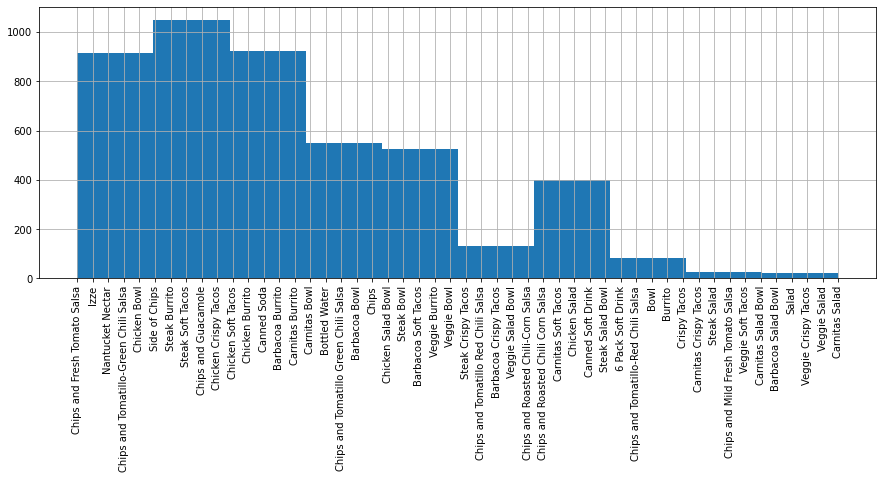

In [62]:
plt.figure(figsize=(15, 5))
chipo.item_name.hist()

plt.xticks(rotation = 90)
plt.show()

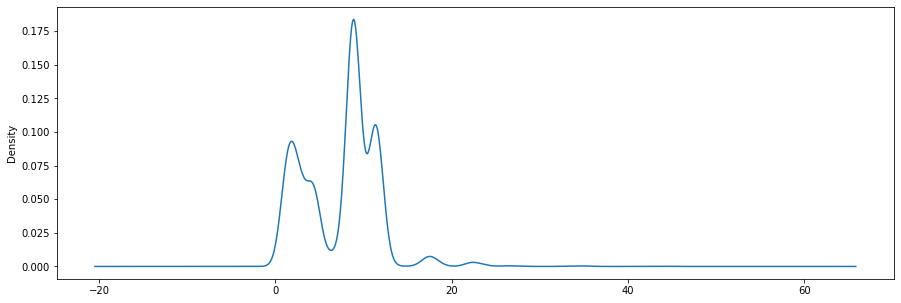

In [73]:
plt.figure(figsize=(15, 5))

tmp = chipo.item_price.str.replace('$', '', regex=False)
tmp = tmp.astype(float)
tmp.plot(kind='density')

plt.show()

In [71]:
chipo[tmp > 40]

,Unnamed: 0,order_id,quantity,item_name,choice_description,item_price
3598,3598,1443,15,Chips and Fresh Tomato Salsa,NaN,$44.25


### 5. Missing values

It is mandatory to check whether there are missing values!
> **Pay attention**: there is no standard way to express missing data!

In [74]:
# Standard way to express missing data is with Nan
chipo.isna()

,Unnamed: 0,order_id,quantity,item_name,choice_description,item_price
0,False,False,False,False,True,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,True,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
4617,False,False,False,False,False,False
4618,False,False,False,False,False,False
4619,False,False,False,False,False,False
4620,False,False,False,False,False,False


In [75]:
chipo.notna()

,Unnamed: 0,order_id,quantity,item_name,choice_description,item_price
0,True,True,True,True,False,True
1,True,True,True,True,True,True
2,True,True,True,True,True,True
3,True,True,True,True,False,True
4,True,True,True,True,True,True
...,...,...,...,...,...,...
4617,True,True,True,True,True,True
4618,True,True,True,True,True,True
4619,True,True,True,True,True,True
4620,True,True,True,True,True,True


**Any and All** are two Python operators that help you finding a sequence of all True values (`all()`) and a sequence in which at least on value is True (`any()`). 

In [76]:
print('any([True, False]) = ', any([True, False]))
print('any([False, False]) = ', any([False, False]))
print('any([True, True]) = ', any([True, True]))

any([True, False]) =  True
any([False, False]) =  False
any([True, True]) =  True


In [77]:
print('all([True, False]) = ', all([True, False]))
print('all([False, False]) = ', all([False, False]))
print('all([True, True]) = ', all([True, True]))

all([True, False]) =  False
all([False, False]) =  False
all([True, True]) =  True


In [78]:
# chipo[chipo.isna().any(axis=1)]
chipo.loc[chipo.isna().any(axis=1)]

,Unnamed: 0,order_id,quantity,item_name,choice_description,item_price
0,0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
3,3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
6,6,3,1,Side of Chips,NaN,$1.69
10,10,5,1,Chips and Guacamole,NaN,$4.45
14,14,7,1,Chips and Guacamole,NaN,$4.45
...,...,...,...,...,...,...
4600,4600,1827,1,Chips and Guacamole,NaN,$4.45
4605,4605,1828,1,Chips and Guacamole,NaN,$4.45
4613,4613,1831,1,Chips,NaN,$2.15
4614,4614,1831,1,Bottled Water,NaN,$1.50


In [79]:
chipo.isna().any(axis=0)

Unnamed: 0            False
order_id              False
quantity              False
item_name             False
choice_description     True
item_price            False
dtype: bool

In [80]:
#chipo.dropna(axis=1)
chipo.dropna(axis=0)

,Unnamed: 0,order_id,quantity,item_name,choice_description,item_price
1,1,1,1,Izze,[Clementine],$3.39
2,2,1,1,Nantucket Nectar,[Apple],$3.39
4,4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
7,7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
...,...,...,...,...,...,...
4617,4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


In [81]:
# chipo.loc[chipo.isna().any(axis=1), 'choice_description'] = 'Boh'
chipo['choice_description'].fillna('No description.')

0                                         No description.
1                                            [Clementine]
2                                                 [Apple]
3                                         No description.
4       [Tomatillo-Red Chili Salsa (Hot), [Black Beans...
                              ...                        
4617    [Fresh Tomato Salsa, [Rice, Black Beans, Sour ...
4618    [Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...
4619    [Fresh Tomato Salsa, [Fajita Vegetables, Pinto...
4620    [Fresh Tomato Salsa, [Fajita Vegetables, Lettu...
4621    [Fresh Tomato Salsa, [Fajita Vegetables, Pinto...
Name: choice_description, Length: 4622, dtype: object

In [82]:
chipo['choice_description'].fillna('No description.', inplace=True)

In [83]:
chipo.isna().any(axis=0)

Unnamed: 0            False
order_id              False
quantity              False
item_name             False
choice_description    False
item_price            False
dtype: bool

In [84]:
# Replace non-standard way to express missing values
chipo['choice_description'].replace('No description.', np.nan)

0                                                     NaN
1                                            [Clementine]
2                                                 [Apple]
3                                                     NaN
4       [Tomatillo-Red Chili Salsa (Hot), [Black Beans...
                              ...                        
4617    [Fresh Tomato Salsa, [Rice, Black Beans, Sour ...
4618    [Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...
4619    [Fresh Tomato Salsa, [Fajita Vegetables, Pinto...
4620    [Fresh Tomato Salsa, [Fajita Vegetables, Lettu...
4621    [Fresh Tomato Salsa, [Fajita Vegetables, Pinto...
Name: choice_description, Length: 4622, dtype: object

### 6. Duplicates

When working with data, especially in Machine Learning, we do not want duplicates!

> Can you give me a reason?

In [85]:
chipo['order_id'].is_unique

False

In [86]:
chipo['order_id'].nunique()

1834

> Always check the dataset shape after dropping data!

In [87]:
chipo.drop_duplicates(subset=['order_id'])

,Unnamed: 0,order_id,quantity,item_name,choice_description,item_price
0,0,1,1,Chips and Fresh Tomato Salsa,No description.,$2.39
4,4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
7,7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
9,9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25
...,...,...,...,...,...,...
4610,4610,1830,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4612,4612,1831,1,Carnitas Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",$9.25
4615,4615,1832,1,Chicken Soft Tacos,"[Fresh Tomato Salsa, [Rice, Cheese, Sour Cream]]",$8.75
4617,4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75


### 7. See the columns (aka features or attributes)

In [88]:
# Names of the columns
list(chipo.columns)

['Unnamed: 0',
 'order_id',
 'quantity',
 'item_name',
 'choice_description',
 'item_price']

> What is "Unnamed: 0"?

In [89]:
chipo.describe() 

# Notice: By default, only the numeric columns are returned.
#chipo.describe(include = "all") 

,Unnamed: 0,order_id,quantity
count,4622.000000,4622.000000,4622.000000
mean,2310.500000,927.254868,1.075725
std,1334.400802,528.890796,0.410186
min,0.000000,1.000000,1.000000
25%,1155.250000,477.250000,1.000000
50%,2310.500000,926.000000,1.000000
75%,3465.750000,1393.000000,1.000000
max,4621.000000,1834.000000,15.000000


In [90]:
for col in chipo.columns:
    print(f'Num uniques in {col}:', chipo[col].nunique())

Num uniques in Unnamed: 0: 4622
Num uniques in order_id: 1834
Num uniques in quantity: 9
Num uniques in item_name: 50
Num uniques in choice_description: 1044
Num uniques in item_price: 78


In [91]:
# Let's see the menu
chipo.item_name.unique()
# chipo['item_name'].unique()

array(['Chips and Fresh Tomato Salsa', 'Izze', 'Nantucket Nectar',
       'Chips and Tomatillo-Green Chili Salsa', 'Chicken Bowl',
       'Side of Chips', 'Steak Burrito', 'Steak Soft Tacos',
       'Chips and Guacamole', 'Chicken Crispy Tacos',
       'Chicken Soft Tacos', 'Chicken Burrito', 'Canned Soda',
       'Barbacoa Burrito', 'Carnitas Burrito', 'Carnitas Bowl',
       'Bottled Water', 'Chips and Tomatillo Green Chili Salsa',
       'Barbacoa Bowl', 'Chips', 'Chicken Salad Bowl', 'Steak Bowl',
       'Barbacoa Soft Tacos', 'Veggie Burrito', 'Veggie Bowl',
       'Steak Crispy Tacos', 'Chips and Tomatillo Red Chili Salsa',
       'Barbacoa Crispy Tacos', 'Veggie Salad Bowl',
       'Chips and Roasted Chili-Corn Salsa',
       'Chips and Roasted Chili Corn Salsa', 'Carnitas Soft Tacos',
       'Chicken Salad', 'Canned Soft Drink', 'Steak Salad Bowl',
       '6 Pack Soft Drink', 'Chips and Tomatillo-Red Chili Salsa', 'Bowl',
       'Burrito', 'Crispy Tacos', 'Carnitas Crispy Tacos

### 8. Let's explore the data

This step is important to understand if you forgot to do something. <br>
It is a good practice to ask questions!

#### Which was the most-ordered item? 

In [92]:
chipo['item_name'].value_counts()

Chicken Bowl                             726
Chicken Burrito                          553
Chips and Guacamole                      479
Steak Burrito                            368
Canned Soft Drink                        301
Steak Bowl                               211
Chips                                    211
Bottled Water                            162
Chicken Soft Tacos                       115
Chips and Fresh Tomato Salsa             110
Chicken Salad Bowl                       110
Canned Soda                              104
Side of Chips                            101
Veggie Burrito                            95
Barbacoa Burrito                          91
Veggie Bowl                               85
Carnitas Bowl                             68
Barbacoa Bowl                             66
Carnitas Burrito                          59
Steak Soft Tacos                          55
6 Pack Soft Drink                         54
Chips and Tomatillo Red Chili Salsa       48
Chicken Cr

In [93]:
# Equivalent in SQL
chipo.groupby('item_name').size().sort_values(ascending=False)

item_name
Chicken Bowl                             726
Chicken Burrito                          553
Chips and Guacamole                      479
Steak Burrito                            368
Canned Soft Drink                        301
Steak Bowl                               211
Chips                                    211
Bottled Water                            162
Chicken Soft Tacos                       115
Chicken Salad Bowl                       110
Chips and Fresh Tomato Salsa             110
Canned Soda                              104
Side of Chips                            101
Veggie Burrito                            95
Barbacoa Burrito                          91
Veggie Bowl                               85
Carnitas Bowl                             68
Barbacoa Bowl                             66
Carnitas Burrito                          59
Steak Soft Tacos                          55
6 Pack Soft Drink                         54
Chips and Tomatillo Red Chili Salsa       48


#### What was the most ordered item in the choice_description column?

In [94]:
c = chipo.groupby('choice_description').sum()
c = c.sort_values(['quantity'], ascending=False)
c

,Unnamed: 0,order_id,quantity
choice_description,,,
No description.,2938245,1178731,1382
[Diet Coke],307515,123455,159
[Coke],305944,122752,143
[Sprite],200825,80426,89
"[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream, Lettuce]]",107573,43088,49
...,...,...,...
"[Roasted Chili Corn Salsa, [Rice, Fajita Vegetables, Black Beans, Sour Cream, Cheese]]",145,65,1
"[Roasted Chili Corn Salsa, [Rice, Fajita Vegetables, Cheese, Lettuce, Guacamole]]",940,387,1
"[Roasted Chili Corn Salsa, [Rice, Fajita Vegetables, Cheese]]",4416,1761,1


#### How many items were orderd in total?

In [95]:
total_items_orders = chipo.quantity.sum()
total_items_orders

4972

#### How many orders were made in the period?

In [96]:
orders = chipo.order_id.value_counts().count()
orders

1834

#### Which is the maximum item price?

In [97]:
chipo.item_price.max()

'$9.39 '

> **Oops**: the price is a string!

### 9. Convert columns

Sometime the preprocessing of data might cause some columns to get the wrong data type.
In this step, we make sure that each column has the right type.

In [98]:
chipo.dtypes

Unnamed: 0             int64
order_id               int64
quantity               int64
item_name             object
choice_description    object
item_price            object
dtype: object

In [99]:
chipo.item_price.dtype

dtype('O')

In [100]:
chipo.item_price.unique()

array(['$2.39 ', '$3.39 ', '$16.98 ', '$10.98 ', '$1.69 ', '$11.75 ',
       '$9.25 ', '$4.45 ', '$8.75 ', '$11.25 ', '$8.49 ', '$2.18 ',
       '$8.99 ', '$1.09 ', '$2.95 ', '$2.15 ', '$3.99 ', '$22.50 ',
       '$11.48 ', '$17.98 ', '$17.50 ', '$4.30 ', '$5.90 ', '$1.25 ',
       '$23.78 ', '$6.49 ', '$11.08 ', '$1.50 ', '$22.16 ', '$32.94 ',
       '$22.20 ', '$10.58 ', '$2.50 ', '$23.50 ', '$7.40 ', '$18.50 ',
       '$3.00 ', '$6.78 ', '$11.89 ', '$9.39 ', '$4.00 ', '$3.75 ',
       '$8.69 ', '$2.29 ', '$8.90 ', '$3.27 ', '$3.89 ', '$8.19 ',
       '$35.00 ', '$27.75 ', '$11.80 ', '$6.00 ', '$26.25 ', '$21.96 ',
       '$4.36 ', '$7.50 ', '$4.78 ', '$13.35 ', '$6.45 ', '$5.07 ',
       '$22.96 ', '$7.17 ', '$7.98 ', '$4.50 ', '$26.07 ', '$12.98 ',
       '$35.25 ', '$44.25 ', '$10.50 ', '$33.75 ', '$16.38 ', '$13.52 ',
       '$5.00 ', '$15.00 ', '$8.50 ', '$17.80 ', '$1.99 ', '$11.49 '],
      dtype=object)

Create a lambda function and change the type of item price

In [101]:
dollarizer = lambda x: float(x[1:-1])
chipo.item_price = chipo.item_price.apply(dollarizer)

In [102]:
# Finally
chipo.item_price.dtype

dtype('float64')

### 10 Continue the data exploration
#### How much was the revenue for the period in the dataset?

In [103]:
revenue = (chipo['quantity'] * chipo['item_price']).sum()
print('Revenue was: $' + str(np.round(revenue,2)))

Revenue was: $39237.02


#### What is the average revenue amount per order?

In [104]:
# Solution 1
chipo['revenue'] = chipo['quantity'] * chipo['item_price']
order_grouped = chipo.groupby(by=['order_id']).sum()
order_grouped.mean()['revenue']

21.39423118865867

In [105]:
# Solution 2
chipo.groupby(by=['order_id']).sum().mean()['revenue']

21.39423118865867

### 11. Remove unwanted columns

In [106]:
chipo

,Unnamed: 0,order_id,quantity,item_name,choice_description,item_price,revenue
0,0,1,1,Chips and Fresh Tomato Salsa,No description.,2.39,2.39
1,1,1,1,Izze,[Clementine],3.39,3.39
2,2,1,1,Nantucket Nectar,[Apple],3.39,3.39
3,3,1,1,Chips and Tomatillo-Green Chili Salsa,No description.,2.39,2.39
4,4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,33.96
...,...,...,...,...,...,...,...
4617,4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75,11.75
4618,4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75,11.75
4619,4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25,11.25
4620,4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75,8.75


In [107]:
# Always check the name of the columns before dropping!
chipo.columns

Index(['Unnamed: 0', 'order_id', 'quantity', 'item_name', 'choice_description',
       'item_price', 'revenue'],
      dtype='object')

In [108]:
chipo = chipo.drop('Unnamed: 0', axis=1)
chipo

,order_id,quantity,item_name,choice_description,item_price,revenue
0,1,1,Chips and Fresh Tomato Salsa,No description.,2.39,2.39
1,1,1,Izze,[Clementine],3.39,3.39
2,1,1,Nantucket Nectar,[Apple],3.39,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,No description.,2.39,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,33.96
...,...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75,11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75,11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25,11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75,8.75


### 12. Save the final dataset

In [95]:
chipo.to_csv('./datasets/chipo_final.csv', index=False)

In [96]:
# Sanity check!
pd.read_csv('./datasets/chipo_final.csv')

,order_id,quantity,item_name,choice_description,item_price,revenue
0,1,1,Chips and Fresh Tomato Salsa,No description.,2.39,2.39
1,1,1,Izze,[Clementine],3.39,3.39
2,1,1,Nantucket Nectar,[Apple],3.39,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,No description.,2.39,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,33.96
...,...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75,11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75,11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25,11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75,8.75


---
## Aggregation and Grouping

An essential piece of analysis of large data is efficient summarization: computing aggregations like ``sum()``, ``mean()``, ``median()``, ``min()``, and ``max()``, in which a single number gives insight into the nature of a potentially large dataset. These functionalities are offered throught the `groupby` interface.

By “group by” we are referring to a process involving one or more of the following steps:
- **Splitting** the data into groups based on some criteria.
- **Applying** a function to each group independently.
- **Combining** the results into a data structure.

Out of these, the split step is the most straightforward. In fact, in many situations we may wish to split the data set into groups and do something with those groups (as we did in the Data science section above). In the apply step, we might wish to do one of the following:
- **Aggregation**: compute a summary statistic (or statistics) for each group. Some examples: compute the group sums or means.
- **Transformation**: perform some group-specific computations and return a like-indexed object. Some examples: standardize data (zscore) within a group or filling NAs within groups with a value derived from each group.
- **Filtration**: discard some groups, according to a group-wise computation that evaluates True or False. Some examples:

I strongly encourage you to read more on the docs:

https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html#splitting-an-object-into-groups

----
## Combining datasets: append and concat

Some of the most interesting studies of data come from combining different data sources.
These operations can involve anything from very straightforward concatenation of two different datasets, to more complicated database-style joins and merges that correctly handle any overlaps between the datasets.
``Series`` and ``DataFrame``s are built with this type of operation in mind, and Pandas includes functions and methods that make this sort of data wrangling fast and straightforward.

Read the docs for more on that: 

https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html#concatenating-objects

----
## Relational Algebra: merge and join

One essential feature offered by Pandas is its high-performance, in-memory join and merge operations.
If you have ever worked with databases, you should be familiar with this type of data interaction.
The main interface for this is the ``pd.merge`` function.

The behavior implemented in ``pd.merge()`` is a subset of what is known as *relational algebra*, which is a formal set of rules for manipulating relational data, and forms the conceptual foundation of operations available in most databases.
The strength of the relational algebra approach is that it proposes several primitive operations, which become the building blocks of more complicated operations on any dataset.
With this lexicon of fundamental operations implemented efficiently in a database or other program, a wide range of fairly complicated composite operations can be performed.

Read the docs for more on that: 

https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html#database-style-dataframe-or-named-series-joining-merging